In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2025-07-08 08:08:48.054287: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751962128.289082      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751962128.361732      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def load_idx_images(filename):
    with open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    return data.reshape(-1, 28, 28)

def load_idx_labels(filename):
    with open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

x_train = load_idx_images('/kaggle/input/mnist-dataset/train-images.idx3-ubyte')
y_train = load_idx_labels('/kaggle/input/mnist-dataset/train-labels.idx1-ubyte')
x_test = load_idx_images('/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte')
y_test = load_idx_labels('/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte')

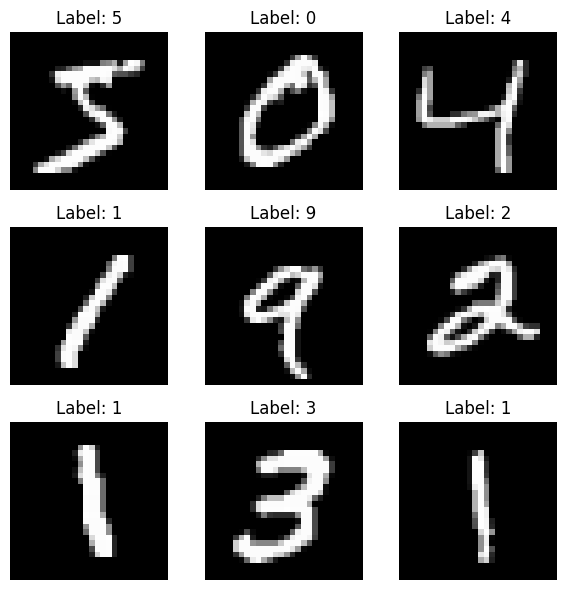

In [3]:
#visulaize the dataset
# Function to display a grid of images
def plot_sample_images(images, labels, num_samples=9):
    plt.figure(figsize=(6,6))
    for i in range(num_samples):
        plt.subplot(3, 3, i + 1)  # 3x3 grid
        plt.imshow(images[i], cmap='gray')  # Display the image
        plt.title(f"Label: {labels[i]}")  # Show label
        plt.axis("off")  # Hide axis
    plt.tight_layout()
    plt.show()

# Visualize sample images
plot_sample_images(x_train, y_train)

In [4]:
#undersating the length of the data
print(len(x_train))
print(len(x_test))

60000
10000


In [5]:
#understading the size of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 image to 1D
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    keras.layers.Dense(64, activation='relu'),   # Another hidden layer
    keras.layers.Dense(10, activation='softmax') # Output layer (10 classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-07-08 08:14:35.928379: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Define metrics 
N.B F1 score is not built-in for multi-class so you can compute it manually using presicson and recall values 

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])


In [18]:
# Train the model
history= model.fit(x_train, y_train, epochs=10,  batch_size=32,  validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8845 - loss: 0.3978 - val_accuracy: 0.9596 - val_loss: 0.1347
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9692 - loss: 0.1035 - val_accuracy: 0.9702 - val_loss: 0.0970
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9794 - loss: 0.0661 - val_accuracy: 0.9680 - val_loss: 0.1006
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9841 - loss: 0.0490 - val_accuracy: 0.9752 - val_loss: 0.0845
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9871 - loss: 0.0412 - val_accuracy: 0.9767 - val_loss: 0.0805
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9906 - loss: 0.0301 - val_accuracy: 0.9781 - val_loss: 0.0749
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9920 - loss: 0.0234 - val_accuracy: 0.9768 - val_loss: 0.0886
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0229 - 

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.9800 - loss: 0.0985

Test Accuracy: 0.9800


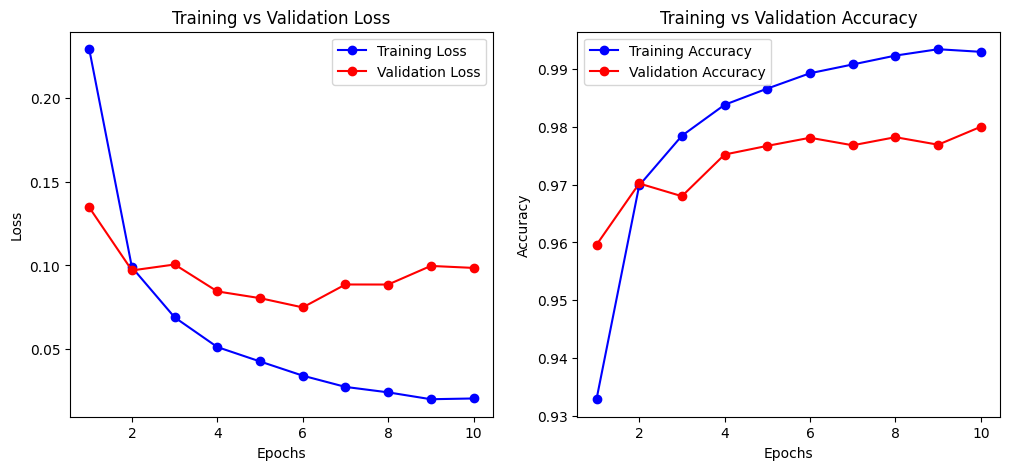

In [20]:
import matplotlib.pyplot as plt

# Extract loss and accuracy values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Plot Training & Validation Loss
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.show()